In [1]:
import _init_paths
import nengo
import nengo_dl
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pickle

from configs.exp_configs import tf_exp_cfg as exp_cfg, nengo_dl_cfg as ngo_cfg
from utils.base_utils.data_prep_utils import get_batches_of_cifar_data
from utils.base_utils.exp_utils import collect_sim_data_spikes, plot_ndl_model_layers_info
from utils.nengo_dl_utils import get_nengo_dl_model
from utils.consts.dir_consts import EXP_OTPT_DIR
from utils.consts.exp_consts import SEED

/home/rgaurav/miniconda3/envs/nengo-tf/lib/python3.7/site-packages/nengo_dl/converter.py:360: UserWarning: Layer '<class 'tensorflow.python.keras.layers.normalization_v2.BatchNormalization'>' already has a converter. Overwriting.
  "Layer '%s' already has a converter. Overwriting." % keras_layer


/home/rgaurav/miniconda3/envs/nengo-tf/lib/python3.7/site-packages/nengo_dl/converter.py:555: UserWarning: Activation type <function softmax at 0x2aad556dd710> does not have a native Nengo equivalent; falling back to a TensorNode
  "falling back to a TensorNode" % activation


Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:02                                               
Layer: <Neurons of <Ensemble "conv2d.0">>, Neuron Type: SpikingRectifiedLinear(), Number of Neurons: 32768, Seed: None
Unique Encoders: [-1.  1.]
Unique Scaled Encoders: [-200.  200.]
Unique bias: [0.]
Unique gain: [200.]
Unique intercepts: [-0.]
****************************************************************************************************
Layer: <Neurons of <Ensemble "conv2d_1.0">>, Neuron Type: SpikingRectifiedLinear(), Number of Neurons: 65536, Seed: None
Unique Encoders: [-1.  1.]
Unique Scaled Encoders: [-200.  200.]
Unique bias: [0.]
Unique gain: [200.]
Unique intercepts: [-0.]
****************************************************************************************************
Layer: <Neurons of <Ensemble "conv2d_2.0">>, Neuron Type: Spik

Layer: <Neurons of <Ensemble "dense_1.0">>, Neuron Type: SpikingRectifiedLinear(), Number of Neurons: 512, Seed: None
Unique Encoders: [-1.  1.]
Unique Scaled Encoders: [-200.  200.]
Unique bias: [-8.90717983e+00 -8.78315258e+00 -8.56030560e+00 -8.47722149e+00
 -7.81741905e+00 -7.69718456e+00 -7.32797527e+00 -7.23151922e+00
 -7.13687992e+00 -6.99928904e+00 -6.98525620e+00 -6.93062115e+00
 -6.86775351e+00 -6.36957884e+00 -6.26619768e+00 -6.18399715e+00
 -6.09449244e+00 -5.77926159e+00 -5.72554255e+00 -5.64192867e+00
 -5.59642935e+00 -5.55014610e+00 -5.52669334e+00 -5.51911545e+00
 -5.47755241e+00 -5.33749151e+00 -5.33650684e+00 -5.16035318e+00
 -5.08794165e+00 -5.01682138e+00 -4.80592394e+00 -4.78347731e+00
 -4.76583242e+00 -4.74253988e+00 -4.70057487e+00 -4.66292667e+00
 -4.58182716e+00 -4.56351280e+00 -4.50580692e+00 -4.40909433e+00
 -4.18088150e+00 -4.13467646e+00 -4.05153465e+00 -4.04335976e+00
 -3.92192817e+00 -3.89032960e+00 -3.88764215e+00 -3.78842950e+00
 -3.75809193e+00 -3.6638

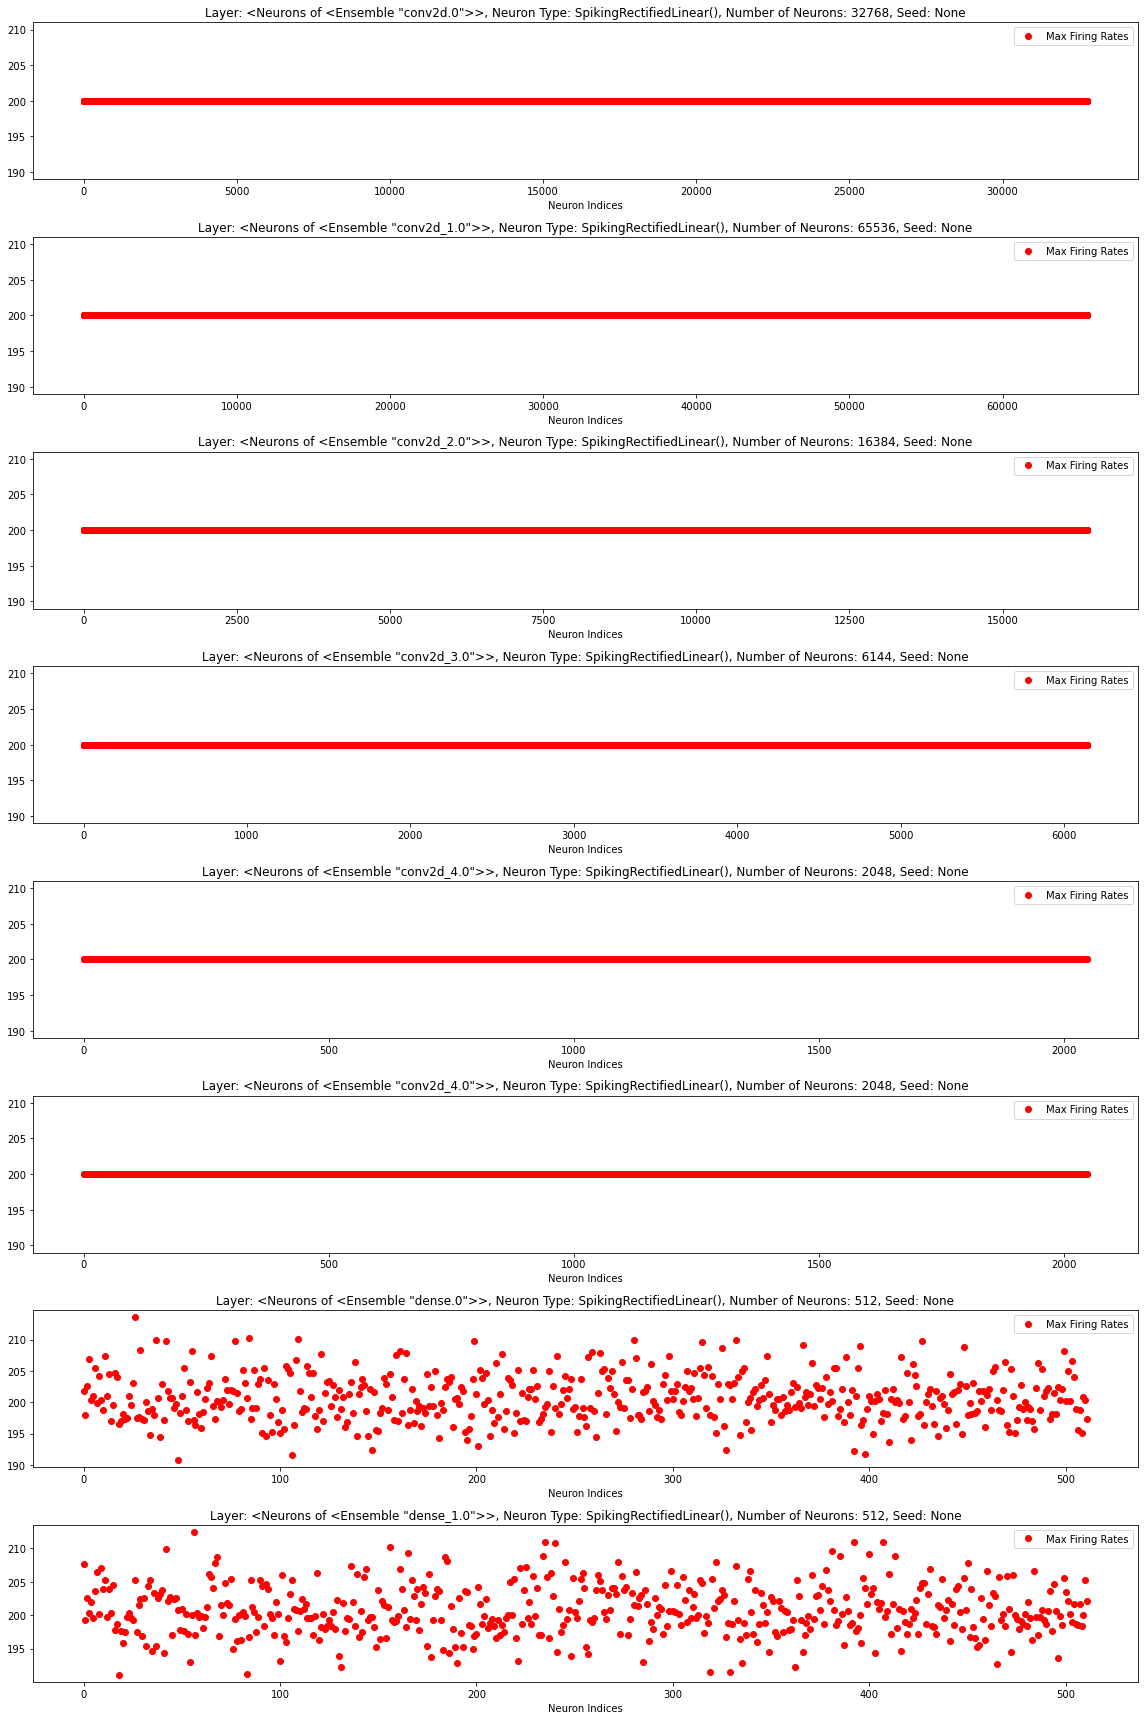

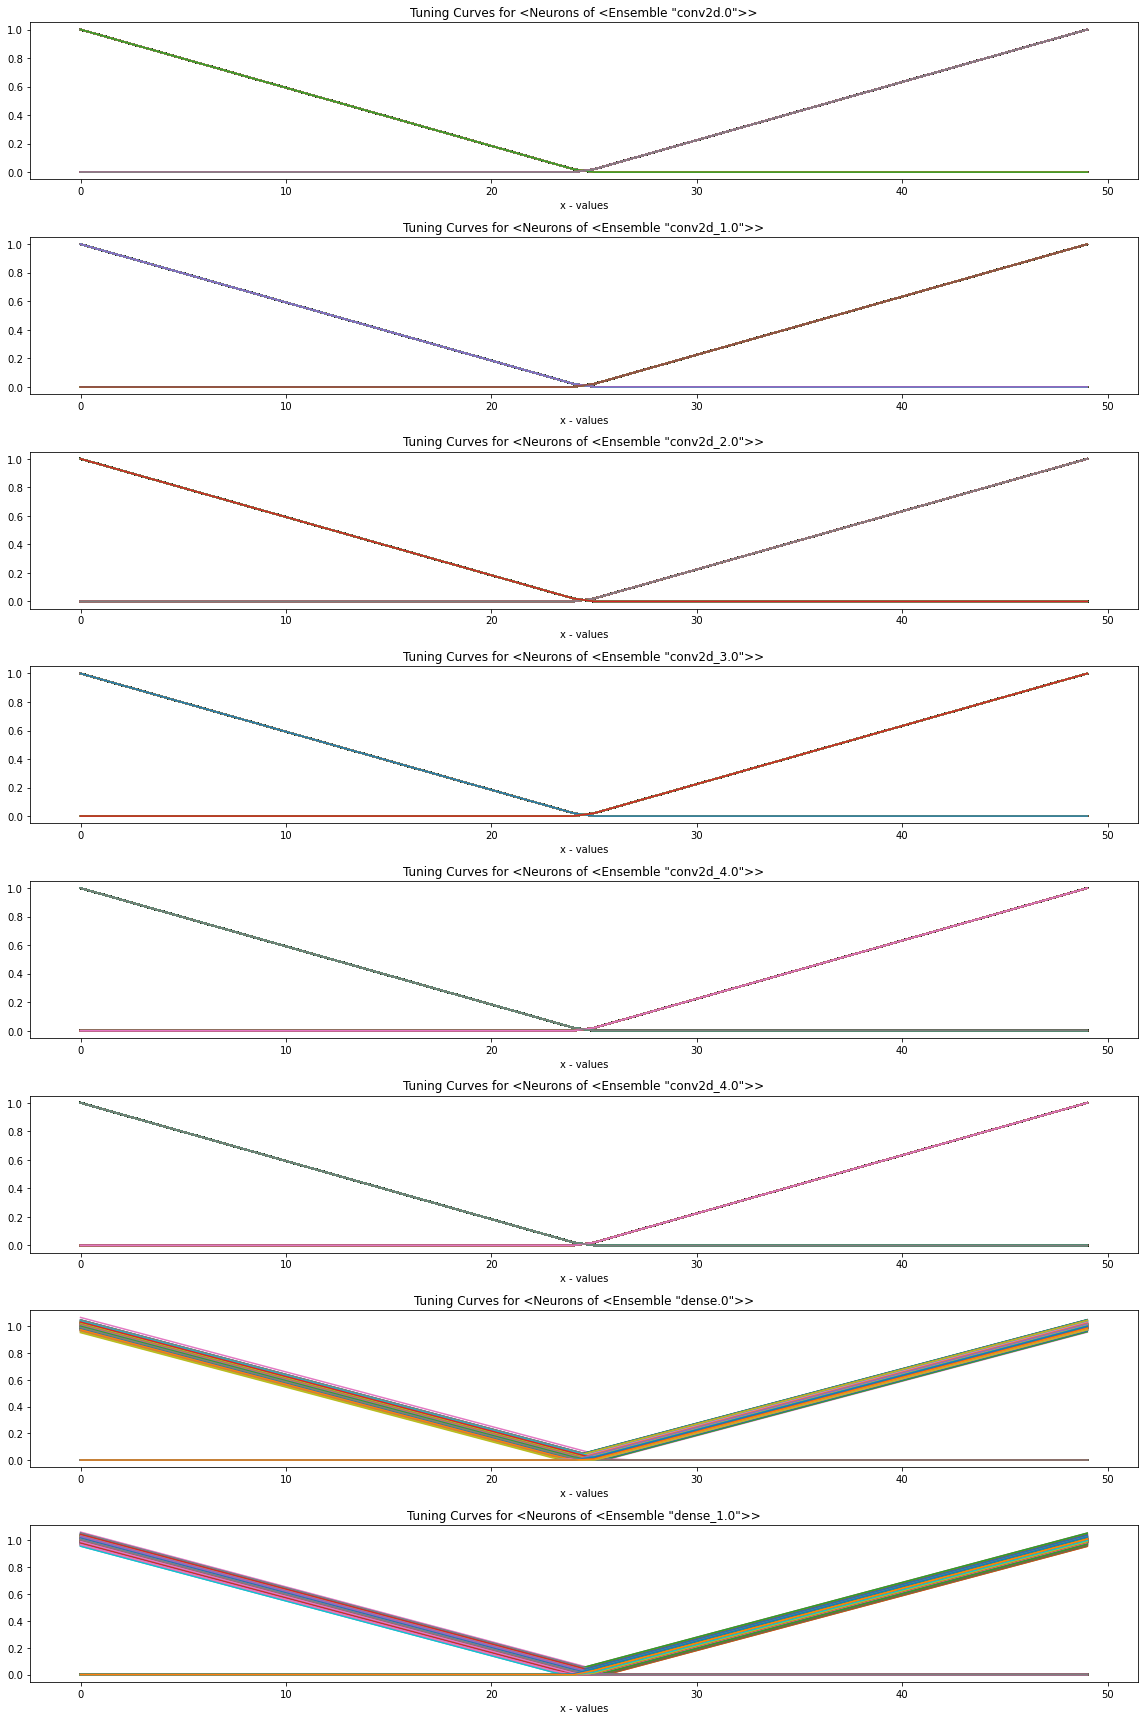

In [2]:
plot_ndl_model_layers_info()

/home/rgaurav/miniconda3/envs/nengo-tf/lib/python3.7/site-packages/nengo_dl/converter.py:555: UserWarning: Activation type <function softmax at 0x2b478435b680> does not have a native Nengo equivalent; falling back to a TensorNode
  "falling back to a TensorNode" % activation


Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:01                                               
Layer: <Neurons of <Ensemble "conv2d.0">>, Neuron Type: RectifiedLinear(), Number of Neurons: 32768, Seed: None
Unique Encoders: [-1.  1.]
Unique Scaled Encoders: [-1.  1.]
Unique bias: [0.]
Unique gain: [1.]
Unique intercepts: [-0.]
****************************************************************************************************
Layer: <Neurons of <Ensemble "conv2d_1.0">>, Neuron Type: RectifiedLinear(), Number of Neurons: 65536, Seed: None
Unique Encoders: [-1.  1.]
Unique Scaled Encoders: [-1.  1.]
Unique bias: [0.]
Unique gain: [1.]
Unique intercepts: [-0.]
****************************************************************************************************
Layer: <Neurons of <Ensemble "conv2d_2.0">>, Neuron Type: RectifiedLinear(), Number of N

Layer: <Neurons of <Ensemble "dense_1.0">>, Neuron Type: RectifiedLinear(), Number of Neurons: 512, Seed: None
Unique Encoders: [-1.  1.]
Unique Scaled Encoders: [-1.  1.]
Unique bias: [-4.45359014e-02 -4.39157635e-02 -4.28015292e-02 -4.23861071e-02
 -3.90870944e-02 -3.84859219e-02 -3.66398767e-02 -3.61575969e-02
 -3.56843993e-02 -3.49964462e-02 -3.49262804e-02 -3.46531048e-02
 -3.43387686e-02 -3.18478942e-02 -3.13309878e-02 -3.09199858e-02
 -3.04724611e-02 -2.88963076e-02 -2.86277123e-02 -2.82096434e-02
 -2.79821474e-02 -2.77507305e-02 -2.76334658e-02 -2.75955778e-02
 -2.73877624e-02 -2.66874582e-02 -2.66825333e-02 -2.58017667e-02
 -2.54397076e-02 -2.50841063e-02 -2.40296200e-02 -2.39173863e-02
 -2.38291621e-02 -2.37126984e-02 -2.35028751e-02 -2.33146325e-02
 -2.29091346e-02 -2.28175633e-02 -2.25290339e-02 -2.20454708e-02
 -2.09044069e-02 -2.06733812e-02 -2.02576742e-02 -2.02167984e-02
 -1.96096413e-02 -1.94516480e-02 -1.94382109e-02 -1.89421475e-02
 -1.87904593e-02 -1.83191374e-02 -1

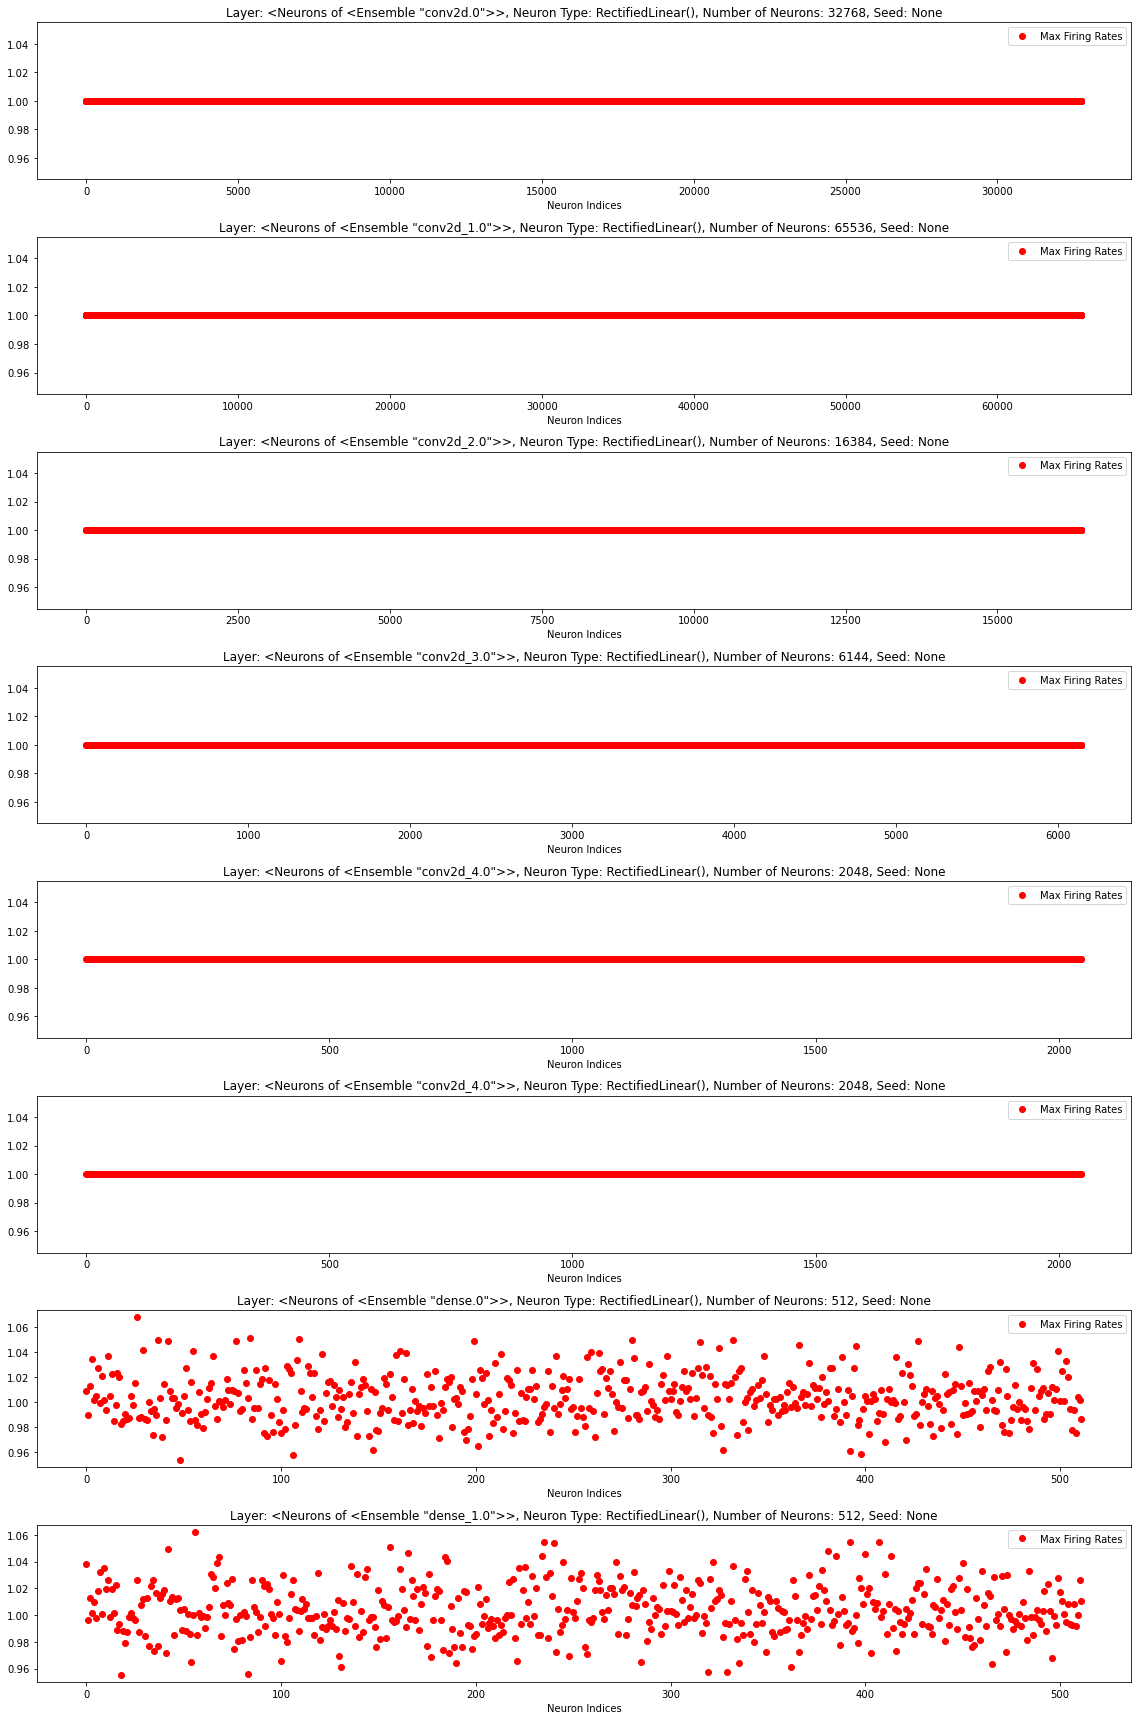

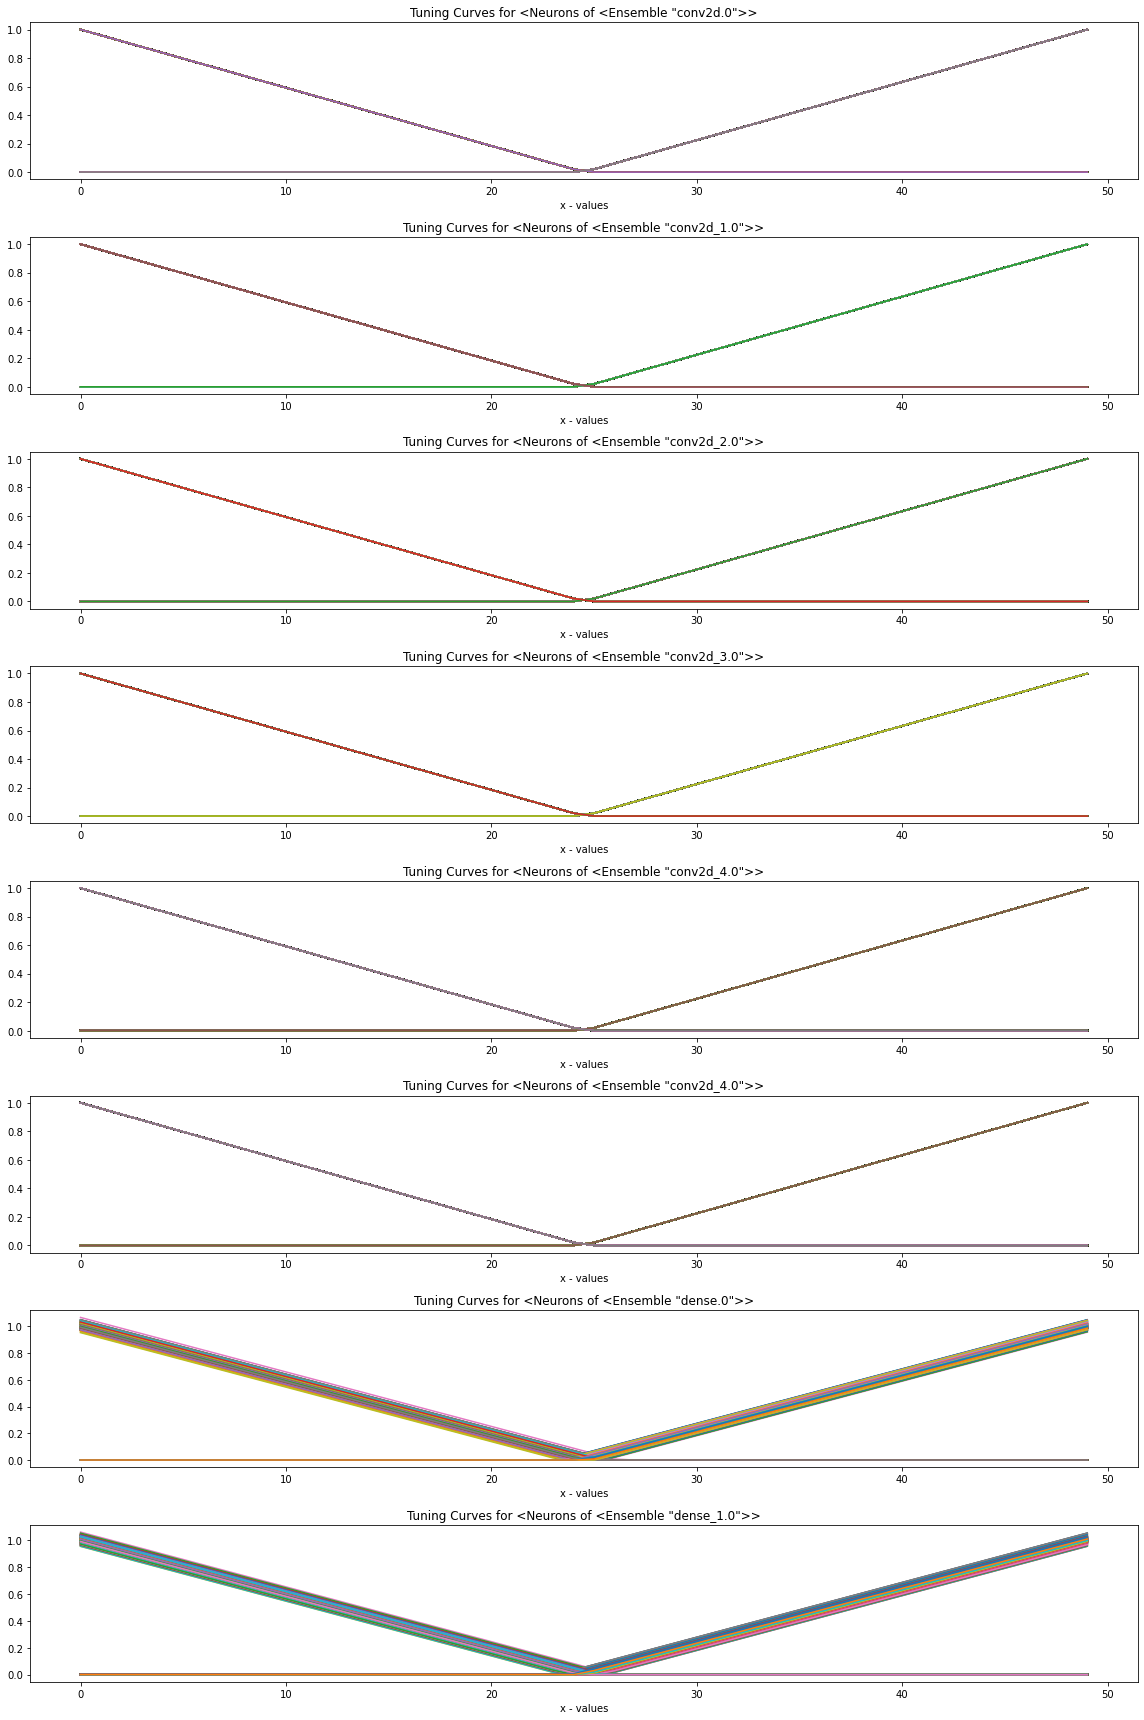

In [2]:
plot_ndl_model_layers_info()